# Exploring the Ford GoBike Trip Dataset :

# Analysis of Factors Causing Long Trips in San Fransisco

## by Shadrack T. Adeyemi

## Introduction

> This dataset contains information of over 183,000 bike rides of a bike-sharing system in the greater San Fransisco Bay Area. This data set has information about individual rides during the month of February, with features such as durations, member gender, customer type, amongst others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# reading the data into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#checking the shape and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> The 'user_type', 'member_gender' and the 'bike_share_for_all_trip' should be categorical columns. The 'start_time' and 'end_time' column should be in datetime format. And the 'start_station_id' should be in int format.

In [4]:
#quick summary statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#checking for duplicate rows
df.duplicated().sum()

0

> No duplicate found in the dataset.

In [6]:
#checking for missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> There are a couple of missing values.Fortunately the dataset is large, therefore the missing values can be dropped without significantly altering the insight.

Checking the values and the counts of the columns that should be categorical below.

In [7]:
#check user types
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
#check gender variable
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
#check bike share variable
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Data Cleaning

All the issues highlighted in the wrangling section will be fixed accordingly below.

In [10]:
# coverting the neccesary columns into categorical dtype

to_convert = ['user_type','member_gender','bike_share_for_all_trip']

for col in to_convert:
  df[col] = df[col].astype('category')

In [11]:
#checking to confirm
df.dtypes

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
dtype: object

In [12]:
#drop missing rows
df.dropna(inplace=True)
df.shape

(174952, 16)

Rows has reduced from 183412 entries to 174952 entries, the columns still remain 16.

In [13]:
#changing dtypes of start and end times
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hour'] = df['start_time'].dt.hour
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hour'] = df['end_time'].dt.hour

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_month,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,February,23,Friday,March,0


In [15]:
# converting the start and end station id column from float to int format
convert = ['start_station_id', 'end_station_id']
for col in convert:
    df[col] = df[col].astype(int)

In [16]:
#create a column to reflect trip duration in minutes as supposed to seconds for easy analysis
df['duration_min'] = df['duration_sec']/60

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### What is the structure of your dataset?

> At this moment the dataset contains 174952 rows and 22 columns.

### What is/are the main feature(s) of interest in your dataset?

>1. What time of day and day of the week are most trips taken?
2. On an average how do the Customers and Subscribers ride duration compare?
3. On an average what Gender takes longer trips?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 >The start date/time and end date/time features, the gender features, and the user types features. 

## Univariate Exploration

I'd start by defining some fuctions to avoid code repetition, then I'd check the duration column for outliers.

In [18]:
#define function to set axis labels and title
def set_labels(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, pad = 25)
    
base_color = sb.color_palette()[0]

In [21]:
# checking the duration column for outliers
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

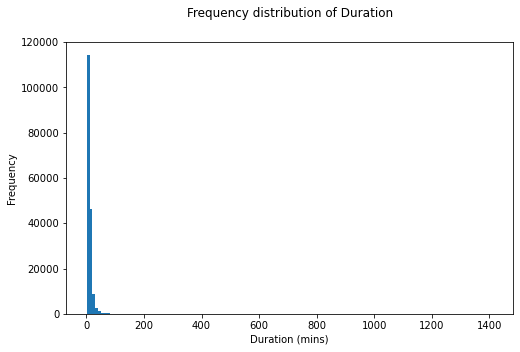

In [20]:
# #plotting for better visual of outliers
bin_edges = np.arange(df.duration_min.min(), df.duration_min.max()+5, 10)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bin_edges)
set_labels('Duration (mins)','Frequency','Frequency distribution of Duration');

The above plot does not give a good visual depiction of the distribution, therfore we'd show a plot for a maximum of 60 minutes duration minutes.

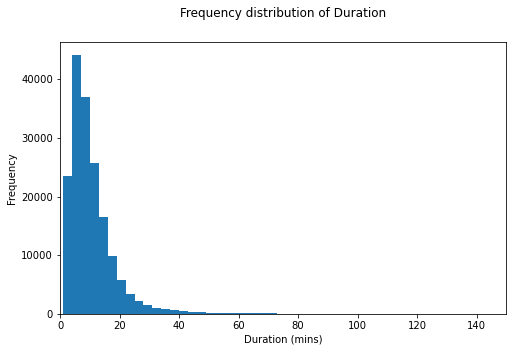

In [22]:
bin_edges = np.arange(df.duration_min.min(), df.duration_min.max()+35,3)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xlim(0,150)
set_labels('Duration (mins)','Frequency','Frequency distribution of Duration');

The above plot shows a high variance and a positively skewed distribution.

In [23]:
df[df['duration_min']>60].shape[0]

1386

We can drop rides over 60 minutes since there are only 1386 of them out of 174952.

In [24]:
df.drop(df[df['duration_min']>60].index, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173566 entries, 4 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173566 non-null  int64         
 1   start_time               173566 non-null  datetime64[ns]
 2   end_time                 173566 non-null  datetime64[ns]
 3   start_station_id         173566 non-null  int32         
 4   start_station_name       173566 non-null  object        
 5   start_station_latitude   173566 non-null  float64       
 6   start_station_longitude  173566 non-null  float64       
 7   end_station_id           173566 non-null  int32         
 8   end_station_name         173566 non-null  object        
 9   end_station_latitude     173566 non-null  float64       
 10  end_station_longitude    173566 non-null  float64       
 11  bike_id                  173566 non-null  int64         
 12  user_type       

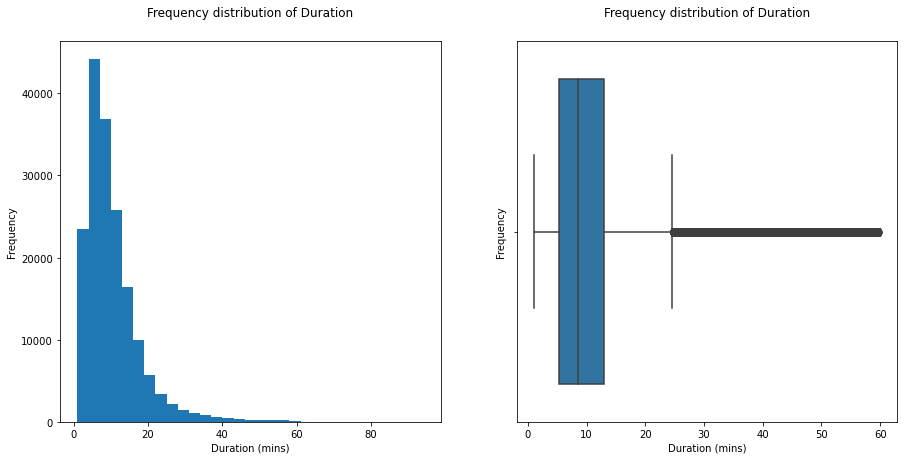

In [26]:
plt.figure(figsize = (15,7))

# create a subplot
plt.subplot(1,2,1)
bin_edges = np.arange(df.duration_min.min(), df.duration_min.max()+35,3)
plt.hist(data=df, x='duration_min', bins=bin_edges)
set_labels('Duration (mins)','Frequency','Frequency distribution of Duration');

# create a subplot
plt.subplot(1,2,2)
# define the b
sb.boxplot(data=df, x='duration_min')
set_labels('Duration (mins)','Frequency','Frequency distribution of Duration');

The above shows the outliers has been handled.

In [27]:
# exploring the distribution of gender

# arrange the categories in the order of highest frequency
make_freq = df.member_gender.value_counts()
make_freq

Male      129574
Female     40419
Other       3573
Name: member_gender, dtype: int64

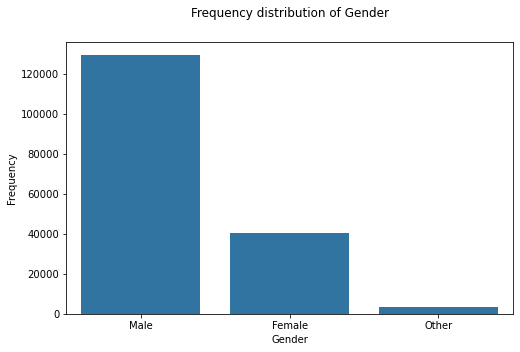

In [28]:
plt.figure(figsize=(8,5))
# use seaborn's countplot to plot a bargraph
sb.countplot(data=df, x='member_gender', color=base_color, order=make_freq.index)
set_labels('Gender','Frequency','Frequency distribution of Gender')

The most bikers appear to be Male and the 'other' gender coming in the least. The 'Other' in the dataset could either be as a result of errors in documenting or could be inclusive of other genders such as the LGBTQ+. For the sake of this analysis we would assume it is inclusive of the LGBTQ+ community.

In [29]:
# exploring the distribution of User Type

# arrange the categories in the order of highest frequency
freq = df.user_type.value_counts()
freq

Subscriber    157702
Customer       15864
Name: user_type, dtype: int64

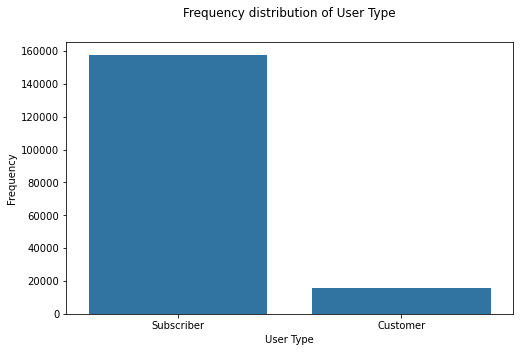

In [30]:
plt.figure(figsize=(8,5))
# use seaborn's countplot to plot a bargraph
sb.countplot(data=df, x='user_type', color=base_color, order=freq.index)
set_labels('User Type','Frequency','Frequency distribution of User Type')

The most of the users are Subscribers, making up approximately 91% of the total users.

Next, we see the distribution of the columns of interest, and attempt to find answers to the questions posed earlier.

#### Question 1: What time of day and day of the week are most trips taken?

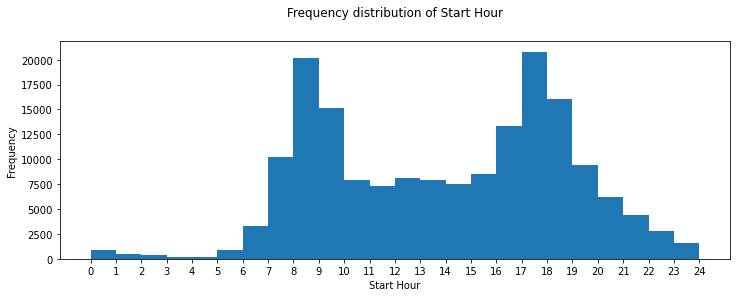

In [31]:
plt.figure(figsize = [12,4])
plt.hist(df['start_hour'], bins = np.arange(0,25,1))
plt.xticks(np.arange(0,25,1))
set_labels('Start Hour','Frequency','Frequency distribution of Start Hour');

The above plot shows that we have a bimodal distribution, with peaks at 8-9 am and 5-6 pm.

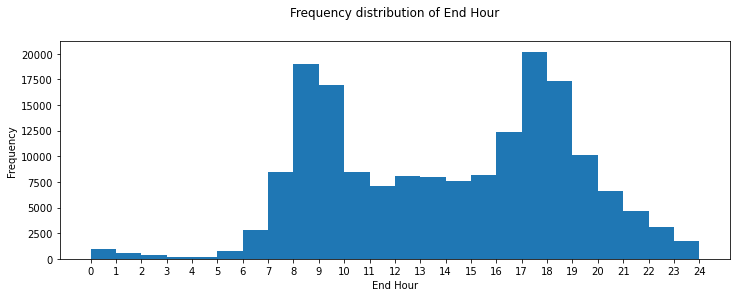

In [32]:
plt.figure(figsize = [12,4])
plt.hist(df['end_hour'], bins = np.arange(0,25,1))
plt.xticks(np.arange(0,25,1))
set_labels('End Hour','Frequency','Frequency distribution of End Hour');

Same as the Start hour, the End hour plot have a bimodal distribution with peaks at 8-9 am and 5-6 pm.

Next, I'd change the Start and End day into ordered categorical dtype representing the days of the week.

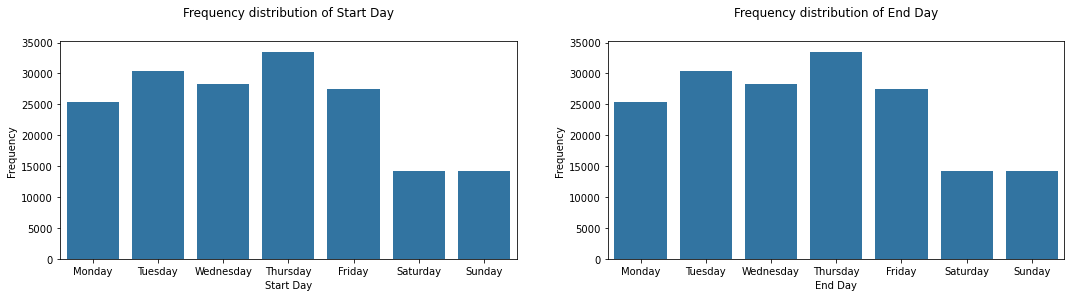

In [33]:
order_of_days = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week = pd.api.types.CategoricalDtype(order_of_days, ordered = True)
df['start_day'] = df['start_day'].astype(week)
df['end_day'] = df['end_day'].astype(week)

plt.figure(figsize = [18,4])

#plotting most bike rides per starting day of week
plt.subplot(1,2,1)

sb.countplot(x=df['start_day'], color = sb.color_palette()[0])
set_labels('Start Day','Frequency','Frequency distribution of Start Day')

#plotting most bike rides per ending day of week
plt.subplot(1,2,2)
sb.countplot(x=df['end_day'], color = sb.color_palette()[0])
set_labels('End Day','Frequency','Frequency distribution of End Day');

Just like the Start hour and End hour, the Start Day and End day have the same distribution. The most bike rides occcurred on Thursday, and interesting to note that majority of the rides are on Weekdays.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration column with a high variance, is positively skewed. 

The gender column has the male with the highest count, and the user type had the Subscribers taking 91 percent of the user data.

The start and end hour has a bimodal distribution with peaks at 8-9 am and 5-6 pm. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The duration column had a couple outliers, the outliers had data from 60 minutes and more. These outliers were in small quantity and were dropped from the dataset.

## Bivariate Exploration

First, let's explore the frequency of the bike rides of hours for every day of the week. I'd use the Start Hour and Start Day data, because we can see from previous plots that they have the same distribution with the End Hour and End Day data.

<Figure size 1296x288 with 0 Axes>

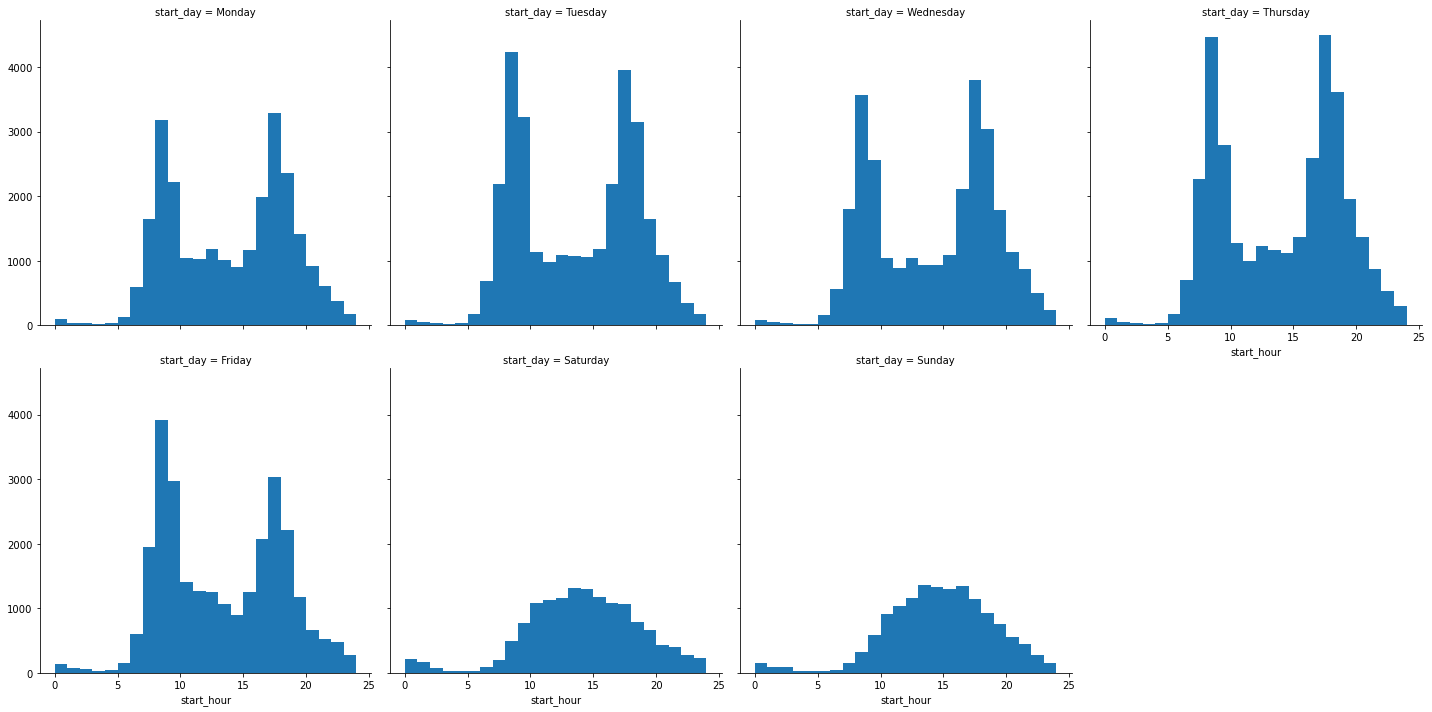

In [34]:
plt.figure(figsize = [18,4])
a = sb.FacetGrid(data = df, col = 'start_day', height = 5, col_wrap=4)
a.map(plt.hist, 'start_hour', bins = np.arange(0,25,1));

The facetgrid gives us a clearer understanding of the data, as we can see that at weekdays distribution is bimodal, and unimodal at weekends. Also at weekends rides the most frequent occur between 1pm and 3 pm, as supposed to the overall previously assumed frequent time rides.

#### Question 2: On an average how do the Customers and Subscribers ride duration compare?

As ascertained earlier in this analysis most of the riders are Subscribers.
For the next analysis we would like to see which User takes longer trips on an average.

First, lets see the overall average ride duration.

In [44]:
#finding the overall average ride duration programmatically
print(df['duration_min'].mean())

10.30835877994559


In [36]:
print('The overall average ride duration is : {:.2f} mins'.format(df['duration_min'].mean()))

The overall average ride duration is : 10.31 mins


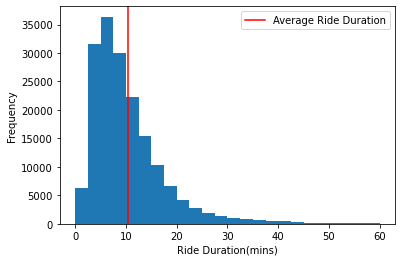

In [37]:
#plotting the overall average ride duration
plt.hist(df['duration_min'], bins = np.arange(0,df['duration_min'].max()+2.5,2.5))
plt.axvline(df['duration_min'].mean(), color='red', label='Average Ride Duration')
plt.xticks(np.arange(0,70,10))
plt.legend()
plt.xlabel('Ride Duration(mins)')
plt.ylabel('Frequency')
plt.show()

Its time to see how the Users compare with the average trip duration.

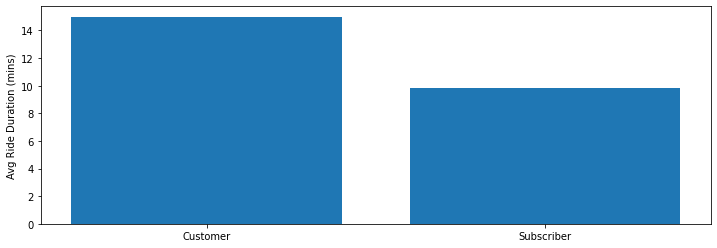

In [38]:
#grouping by User Type to extract means
user_means = df.groupby('user_type').mean().reset_index()

#plotting average ride duration of each User Type
plt.figure(figsize=[12,4])
plt.bar(data = user_means  , x='user_type', height = 'duration_min')
plt.ylabel('Avg Ride Duration (mins)');

Interestingly, the Customers have longer trip duration on the average compared to Subscribers, despite making up only about 9% of the Users.

Let's see the heatmap showing the correlation between all variables.

Text(0.5, 1.0, 'Heat map showing the correlation between all Variables')

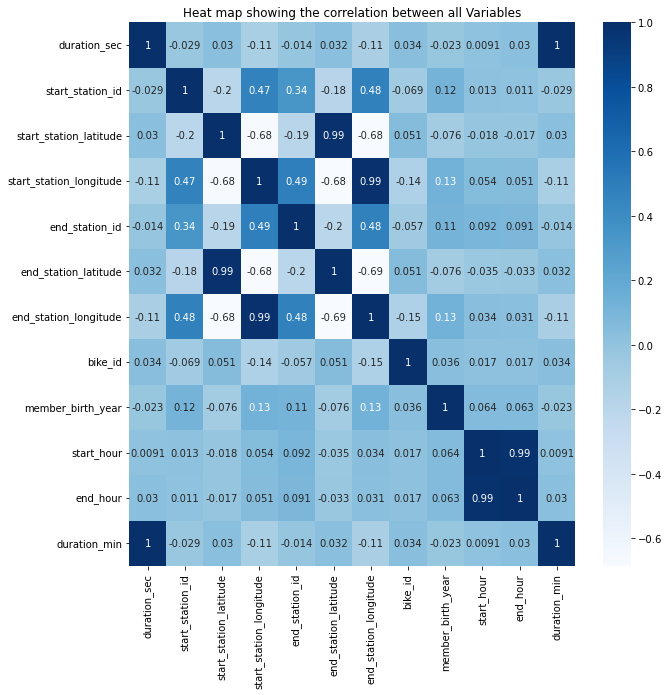

In [40]:
#seaborn plot of the heatmap set to colour blue
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heat map showing the correlation between all Variables')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Upon further investigation of the Start Hour and Start Day columns with facetgrid, we can see that the distribution changed from an overall bimodal distribution to unimodal on weekends and bimodal on weekdays, likewise the peak time changing from an overall 8-9 am and 5-6 pm to between 1pm and 3pm on weekends.

The overall average ride duration is approximately 10 mins, the Customers despite making up only about 9% of the Users, have longer trip duration at approximately 15 mins (5 minutes above the average) compared to Subscribers at approximately 9 mins.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 Interestingly, the member birth year has a weak negative correlation with the duration column. In fact, the menber birth year has weak correlation with other features. To explore the relationship between the member age and other features would be require a few transformation, but this is not my main interest for this analysis, therefore it won't be explored further.

## Multivariate Exploration

> In this section, we'd explore relationships between three or more variables.

#### Question 3: On an average what gender takes longer trips?

Next, we'd explore the relationship between the genders, their frequencies and the average ride duration of each genders both programmatically and most importantly visually.

In [41]:
#average trip duration of the 'male' gender
male_mean = df.query('member_gender == "Male"')['duration_min'].mean()

#average trip duration of the 'female' gender
female_mean = df.query('member_gender == "Female"')['duration_min'].mean()

#average trip duration of the 'other' gender
other_mean = df.query('member_gender == "Other"')['duration_min'].mean()

print('Average trip duration for the \'Male\' gender: {:.2f} mins'.format(male_mean))
print('Average trip duration for the \'Female\' gender: {:.2f} mins'.format(female_mean))
print('Average trip duration for the \'Other\' gender: {:.2f} mins'.format(other_mean));

Average trip duration for the 'Male' gender: 9.98 mins
Average trip duration for the 'Female' gender: 11.26 mins
Average trip duration for the 'Other' gender: 11.43 mins


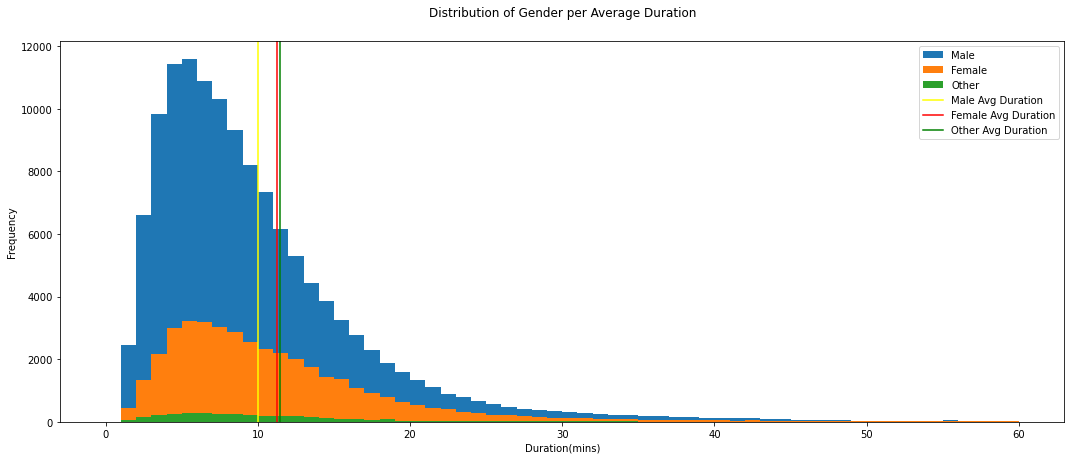

In [42]:
#plotting distribution of ride durations per gender
plt.figure(figsize=[18,7])
plt.hist(x= df.query('member_gender == "Male"')['duration_min'], bins = np.arange(0,61,1), label = 'Male')
plt.hist(x= df.query('member_gender == "Female"')['duration_min'], bins = np.arange(0,61,1), label = 'Female')
plt.hist(x= df.query('member_gender == "Other"')['duration_min'], bins = np.arange(0,61,1), label = 'Other')
set_labels('Duration(mins)', 'Frequency', 'Distribution of Gender per Average Duration')
plt.axvline(male_mean, color='yellow', label='Male Avg Duration')
plt.axvline(female_mean, color='red', label='Female Avg Duration')
plt.axvline(other_mean, color='green', label='Other Avg Duration')
plt.legend(loc='upper right')
plt.show();

Although the 'Other' gender have the least frequent riders they have the highest average ride duration of the genders. Also the Male gender despite having the most frequent riders have the least average ride duration.
The histogram chart shows a positive right skewed distribution.

The previous chart distribution have a long tail, for comparison purpose the next chart plots gender data on a log scale.

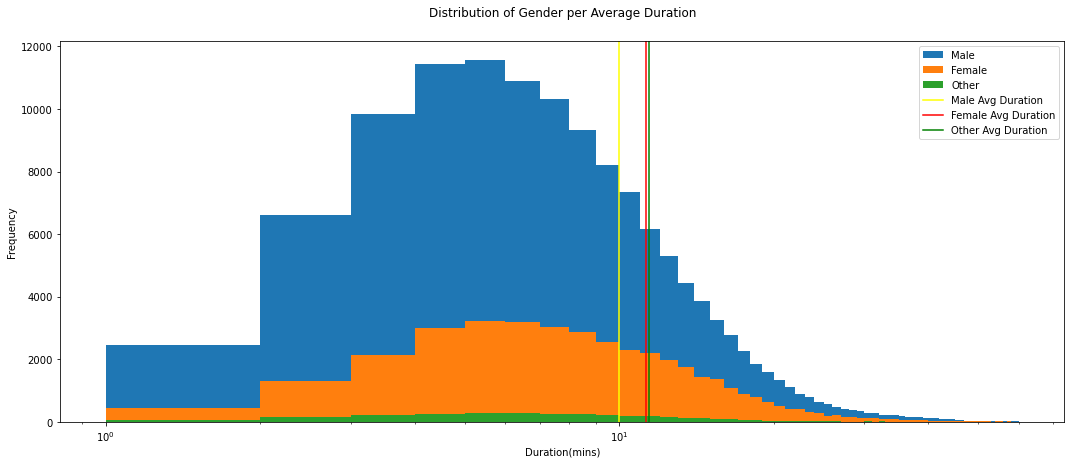

In [43]:
#plotting distribution of ride durations per gender
plt.figure(figsize=[18,7])
plt.hist(x= df.query('member_gender == "Male"')['duration_min'], bins = np.arange(0,61,1), label = 'Male')
plt.hist(x= df.query('member_gender == "Female"')['duration_min'], bins = np.arange(0,61,1), label = 'Female')
plt.hist(x= df.query('member_gender == "Other"')['duration_min'], bins = np.arange(0,61,1), label = 'Other')
plt.xscale('log')
set_labels('Duration(mins)', 'Frequency', 'Distribution of Gender per Average Duration')
plt.axvline(male_mean, color='yellow', label='Male Avg Duration')
plt.axvline(female_mean, color='red', label='Female Avg Duration')
plt.axvline(other_mean, color='green', label='Other Avg Duration')
plt.legend(loc='upper right')
plt.show();

On a log scale it appears to be normally distributed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

After observing the three variables (gender, their respective count, and the average trip duration), it strenghtens my assumption that there's a positive correlation between the gender and the average duration. Also, interestingly the 'other' gender despite having the fewest count have the highest average trip duration.


### Were there any interesting or surprising interactions between features?

After observing the plot, although there is a good interaction between the features, there was no surprise interaction.

## Conclusions

From this analysis, it was observe that :

1. Weekdays and weekends have different bike riding patterns. On weekdays users are most frequent between 8-9 AM and between 5-6 PM, while on weekends bike rides are most frequent during 1-3 PM.
2. When analyzing the days of week, the highest frequency of bike rides occur on weekdays, with Thursdays having the highest frequency of bike rides than any other day.
3. Customers take significantly longer rides on average than subscribers, despite being only 9% of the total users. With an average bike ride duration of 10 minutes, customers take on average 15 minutes per bike ride, whereas subscribers ride for 9 minutes on average.

I'd recommended that the customers be advised to become subscribers or reduced generally, as this will reduce ride durations and increase bikes turnover.